# Housing Price Prediction

# Introduction

In this project, I was data taken from kaggal and I will demonstrate a step-by-step approach to building a housing price prediction model using machine learning techniques. I will explain each step, provide code snippets, and discuss the rationale behind my decisions.

# Project Overview

The goal of this project is to create a model that predicts housing prices based on various features like area, number of bedrooms, bathrooms, and more. Accurate price predictions are crucial for buyers, sellers, and real estate professionals.

# Step 1: Data Collection and Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"Housing.csv", encoding="unicode_ escape")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
data.shape

(545, 13)

In [6]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [7]:
data.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [8]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Step 2: Data Preprocessing

In these step I will try find and removing duplicates ensures data integrity.
also trying to find Null values and handling them it is important for model accuracy.

In [9]:
data.duplicated().sum()

0

In [10]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Step 3: Data Visualization and Analysis

Data visualization helps us understand relationships between variables.
Understanding data distribution and correlations is crucial for feature selection.

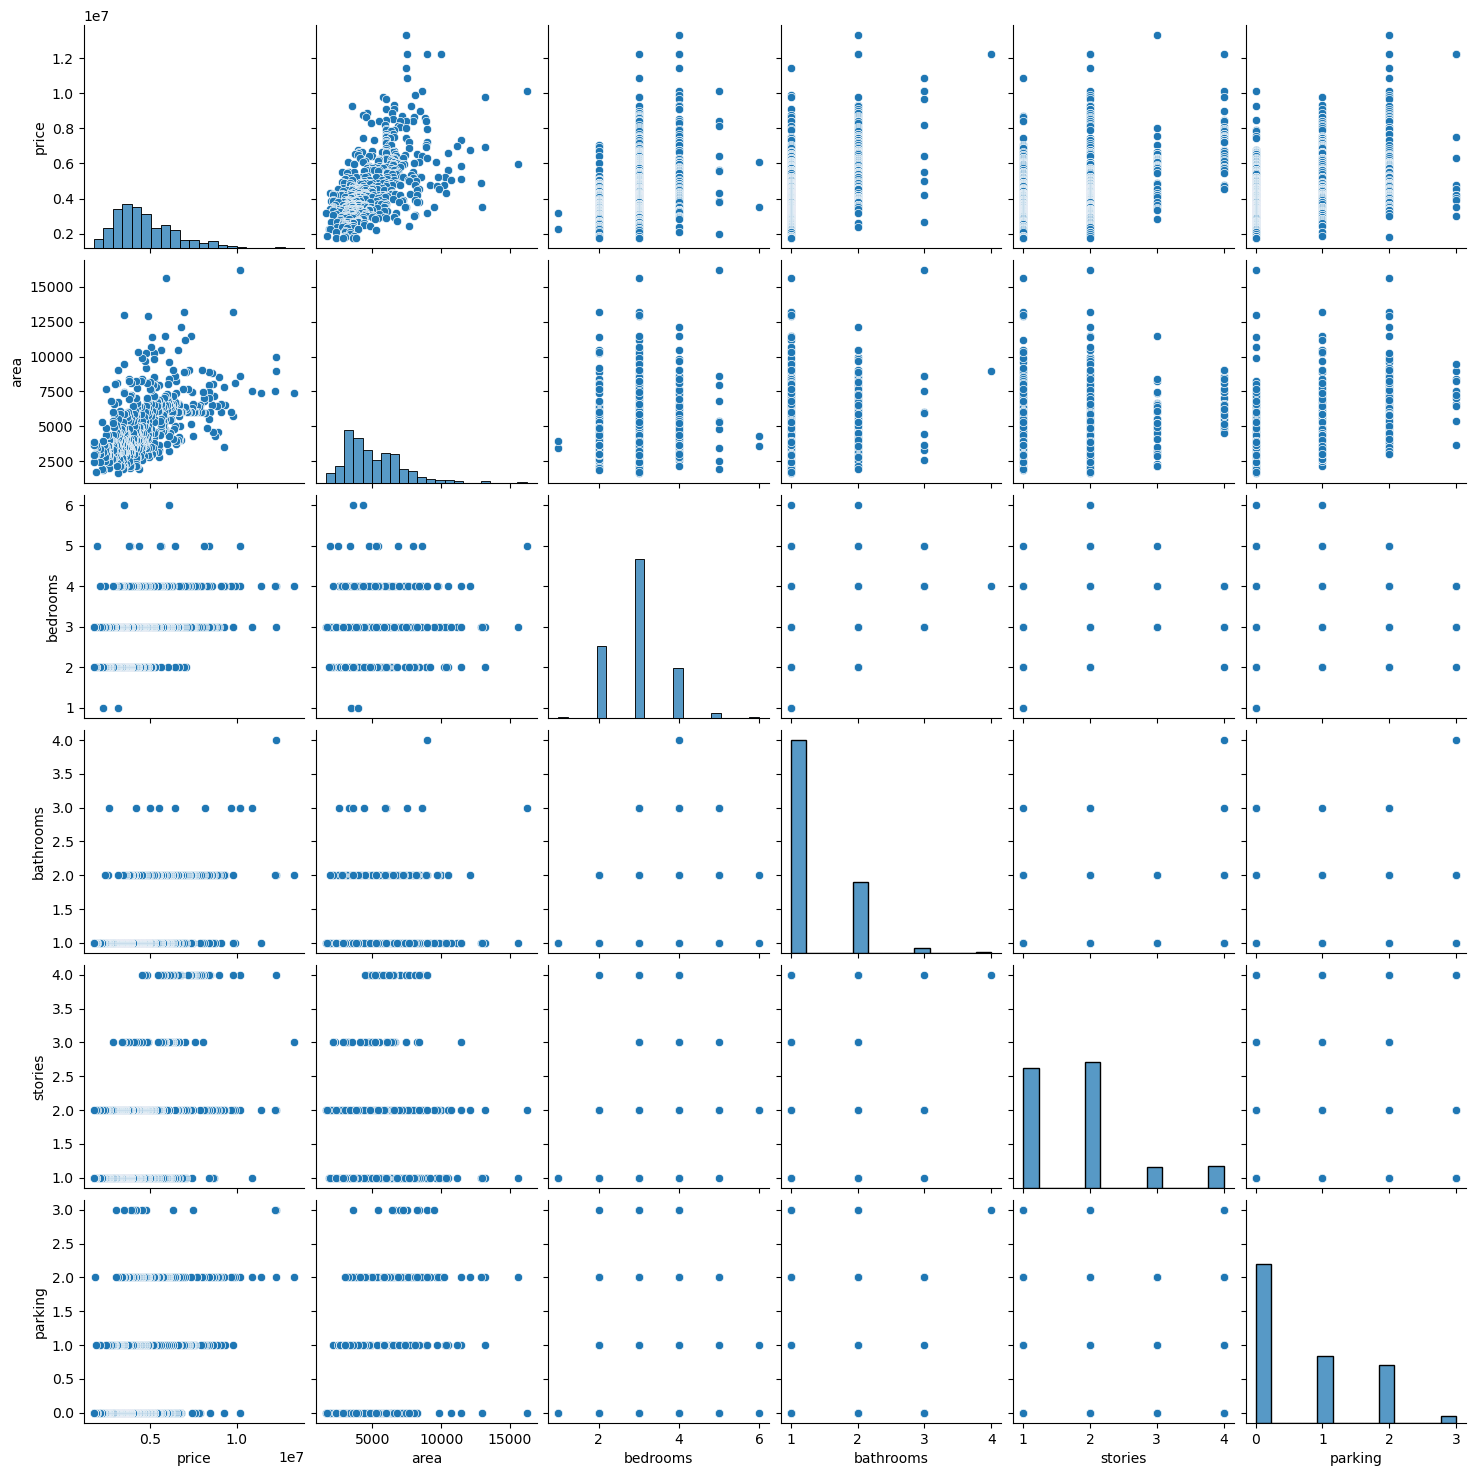

In [11]:
sns.pairplot(data)
plt.show()

In [12]:
data_s=data.corr()

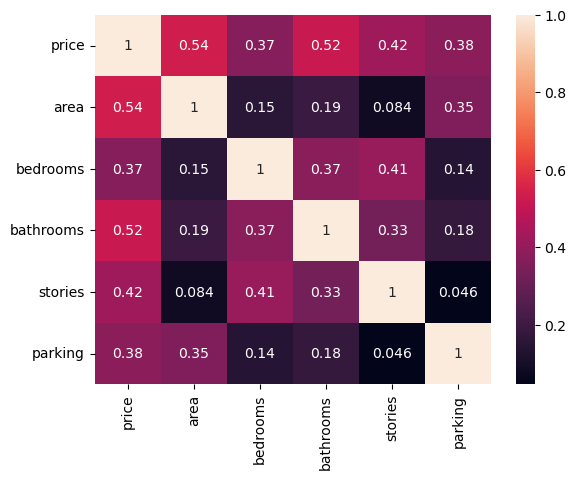

In [13]:
sns.heatmap(data_s, annot=True)
plt.show()

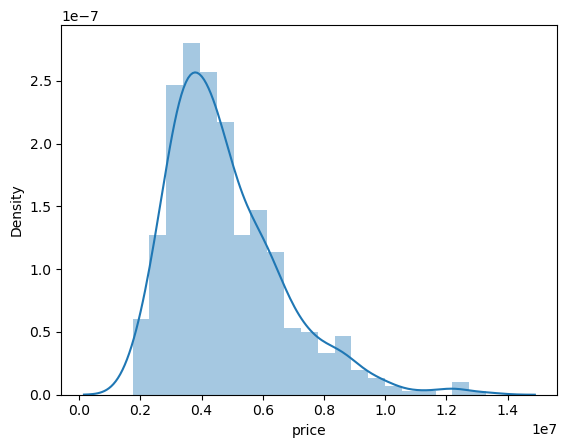

In [14]:
sns.distplot(data["price"])
plt.show()

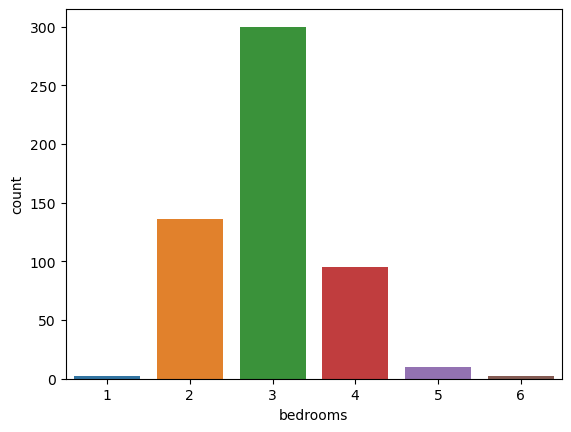

In [15]:
sns.countplot(data['bedrooms'])
plt.show()

# Step-4 : Encoding

AI or ML alogorithms or our models can't understand categorical values for that we need to convert categorical values to numerical values.
Encoding categorical variables is necessary for numerical modeling.

In [16]:
cat_data=data.select_dtypes(include=["object"]).columns

for column in cat_data:
    un_values=data[column].unique()
    print(f"Unique Values for {column}:{un_values}")

Unique Values for mainroad:['yes' 'no']
Unique Values for guestroom:['no' 'yes']
Unique Values for basement:['no' 'yes']
Unique Values for hotwaterheating:['no' 'yes']
Unique Values for airconditioning:['yes' 'no']
Unique Values for prefarea:['yes' 'no']
Unique Values for furnishingstatus:['furnished' 'semi-furnished' 'unfurnished']


In [17]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# Encode the binary variables
binary_encoded = encoder.fit_transform(data[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']])

# Create a DataFrame for the encoded binary variables
binary_encoded_df = pd.DataFrame(binary_encoded, columns=encoder.get_feature_names_out(['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']))

# Replace the original columns with the encoded columns in the dataset
data.drop(['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], axis=1, inplace=True)
data = pd.concat([data, binary_encoded_df], axis=1)


In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["furnishingstatus"]=le.fit_transform(data["furnishingstatus"])

In [19]:
# Check the encoded values for 'furnished', 'semi-furnished', and 'unfurnished'
encoded_values = le.transform(['furnished', 'semi-furnished', 'unfurnished'])

print(f"'furnished' is encoded as: {encoded_values[0]}")
print(f"'semi-furnished' is encoded as: {encoded_values[1]}")
print(f"'unfurnished' is encoded as: {encoded_values[2]}")


'furnished' is encoded as: 0
'semi-furnished' is encoded as: 1
'unfurnished' is encoded as: 2


In [20]:
data

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,2,0,1.0,0.0,0.0,0.0,1.0,1.0
1,12250000,8960,4,4,4,3,0,1.0,0.0,0.0,0.0,1.0,0.0
2,12250000,9960,3,2,2,2,1,1.0,0.0,1.0,0.0,0.0,1.0
3,12215000,7500,4,2,2,3,0,1.0,0.0,1.0,0.0,1.0,1.0
4,11410000,7420,4,1,2,2,0,1.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,2,1.0,0.0,1.0,0.0,0.0,0.0
541,1767150,2400,3,1,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0
542,1750000,3620,2,1,1,0,2,1.0,0.0,0.0,0.0,0.0,0.0
543,1750000,2910,3,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                545 non-null    int64  
 1   area                 545 non-null    int64  
 2   bedrooms             545 non-null    int64  
 3   bathrooms            545 non-null    int64  
 4   stories              545 non-null    int64  
 5   parking              545 non-null    int64  
 6   furnishingstatus     545 non-null    int32  
 7   mainroad_yes         545 non-null    float64
 8   guestroom_yes        545 non-null    float64
 9   basement_yes         545 non-null    float64
 10  hotwaterheating_yes  545 non-null    float64
 11  airconditioning_yes  545 non-null    float64
 12  prefarea_yes         545 non-null    float64
dtypes: float64(6), int32(1), int64(6)
memory usage: 53.3 KB


# Step 5: Outlier Detection

Inthese step I was try to find outliers and handling them.
Utilized box plots and the IQR method to detect and handle outliers in the 'price' and 'area' columns
Outliers can significantly affect model performance, so they need to be addressed.

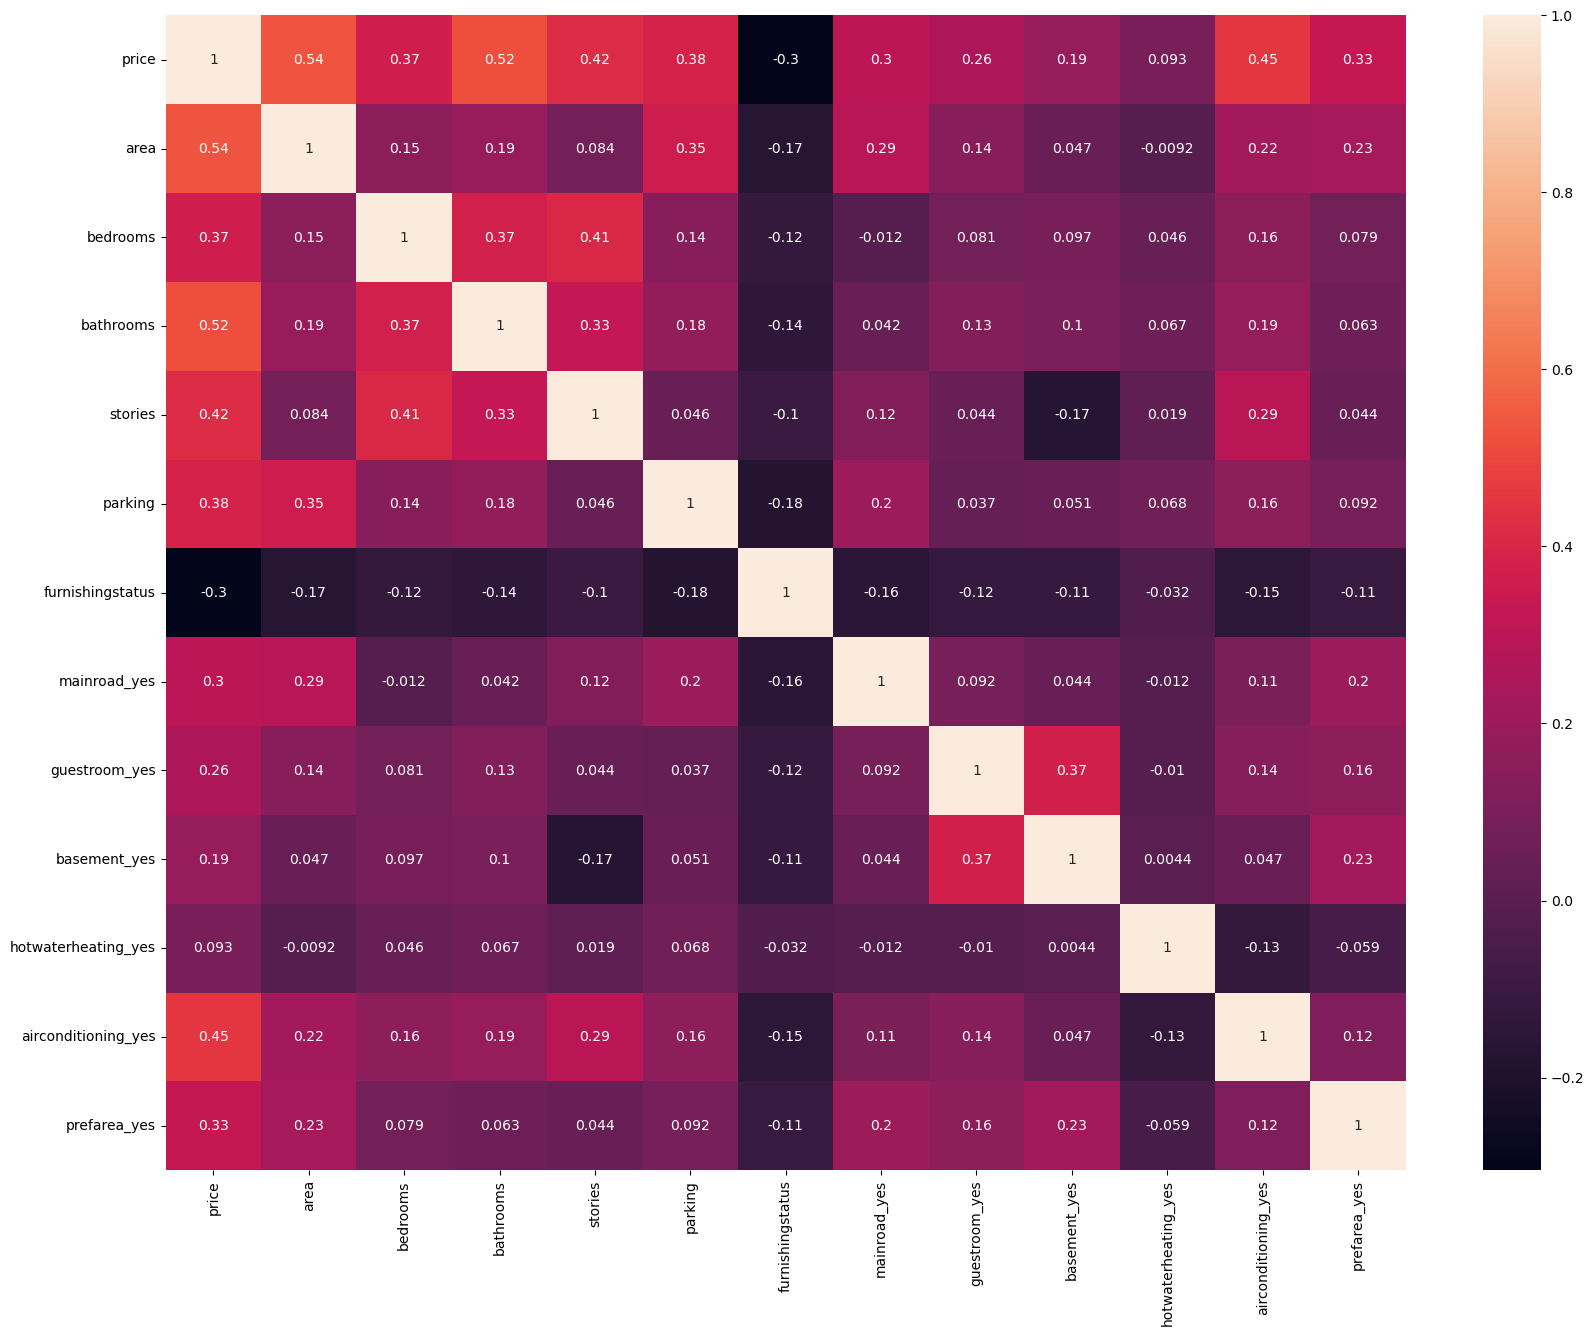

In [22]:
data_s=data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(data_s, annot=True)
plt.show()

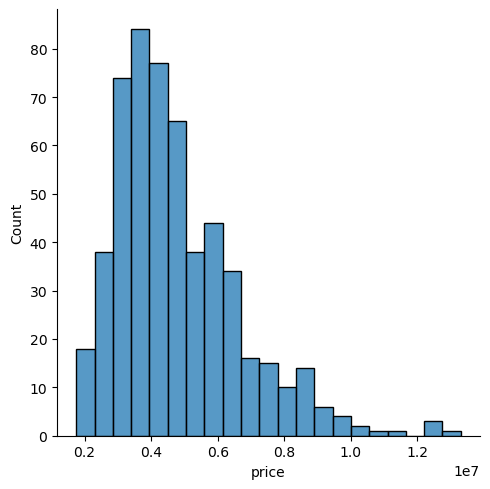

In [23]:
sns.displot(data['price'])
plt.show()

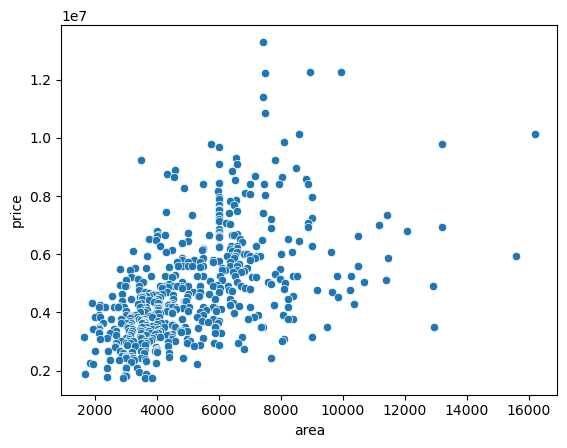

In [24]:
sns.scatterplot(x='area', y='price', data=data)
plt.show()

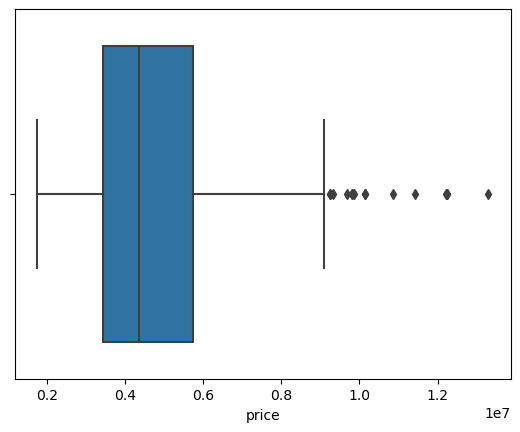

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for numerical features
sns.boxplot(x=data['price'])
plt.show()


In [26]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (data['price'] < lower_bound) | (data['price'] > upper_bound)
outlier_data = data[outliers]
outlier_data

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,2,0,1.0,0.0,0.0,0.0,1.0,1.0
1,12250000,8960,4,4,4,3,0,1.0,0.0,0.0,0.0,1.0,0.0
2,12250000,9960,3,2,2,2,1,1.0,0.0,1.0,0.0,0.0,1.0
3,12215000,7500,4,2,2,3,0,1.0,0.0,1.0,0.0,1.0,1.0
4,11410000,7420,4,1,2,2,0,1.0,1.0,1.0,0.0,1.0,0.0
5,10850000,7500,3,3,1,2,1,1.0,0.0,1.0,0.0,1.0,1.0
6,10150000,8580,4,3,4,2,1,1.0,0.0,0.0,0.0,1.0,1.0
7,10150000,16200,5,3,2,0,2,1.0,0.0,0.0,0.0,0.0,0.0
8,9870000,8100,4,1,2,2,0,1.0,1.0,1.0,0.0,1.0,1.0
9,9800000,5750,3,2,4,1,2,1.0,1.0,0.0,0.0,1.0,1.0


In [27]:
Q1_area = data['area'].quantile(0.25)
Q3_area = data['area'].quantile(0.75)
IQR_area = Q3_area - Q1_area

upper_bound_area = Q3_area + 3 * IQR_area
lower_bound_area = Q1_area - 3 * IQR_area

upper_bound_area, lower_bound_area
data = data[(data['area'] <= upper_bound_area) & (data['area'] >=  lower_bound_area)]

# tep 6: Data Splitting and Scaling

Splitting data allows us to train and test the model.
Feature scaling ensures that all variables have the same scale for modeling.

In [28]:
from sklearn.model_selection import train_test_split
X=data.drop(["price"], axis=1)
y=data["price"]

In [29]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaler=ss.fit_transform(X)

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X_scaler,y, test_size=0.2, random_state=2)

In [31]:
X_train.shape

(434, 12)

In [32]:
X_test.shape

(109, 12)

# Step 7: Model Selection and Training

In these step we choose a variety of regression models to evaluate, such as Linear Regression, Decision Tree Regression, Random Forest Regression, Ridge, Lasso, Gradient Boosting Regression, and Support Vector Regression (SVR).
For each model:
Fit the model on the training data.
Make predictions on the test data.
Calculate and display evaluation metrics: Mean Squared Error (MSE) and R-squared (R2).

In [33]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR

models=[("LinearRegression",LinearRegression()),("DecisionTreeRegressor",DecisionTreeRegressor(random_state=42)),
        ("RandomForestRegressor",RandomForestRegressor(random_state=42)),("Ridge",Ridge()),("Lasso",Lasso()),
        ("GradientBoostingRegressor",GradientBoostingRegressor()),("SVR",SVR())]

for name,model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    mse=mean_squared_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    print(f'Model: {name}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'R-squared (R2): {r2}\n')
    

Model: LinearRegression
Mean Squared Error (MSE): 758651178137.739
R-squared (R2): 0.7957873938971408

Model: DecisionTreeRegressor
Mean Squared Error (MSE): 2164974530940.367
R-squared (R2): 0.4172353462958992

Model: RandomForestRegressor
Mean Squared Error (MSE): 1083178773256.3374
R-squared (R2): 0.7084315341011513

Model: Ridge
Mean Squared Error (MSE): 759211063432.397
R-squared (R2): 0.7956366847986307

Model: Lasso
Mean Squared Error (MSE): 758651989884.6089
R-squared (R2): 0.7957871753923147

Model: GradientBoostingRegressor
Mean Squared Error (MSE): 1206578584783.4546
R-squared (R2): 0.6752149546892375

Model: SVR
Mean Squared Error (MSE): 3899910944676.3413
R-squared (R2): -0.049772280768572985



# Step 8: Model Selection and Saving

As we find in above step we get LinearRegression with 79% accuracy so we use these alorithm for our model
Train the selected model on the entire dataset.
Save the trained model using joblib for future use.

In [35]:
lr=LinearRegression()

In [36]:
lr_model=lr.fit(X_train,y_train)

In [37]:
y_pred=lr_model.predict(X_test)
y_pred

array([ 3325401.08753847,  6993547.12580363,  2681382.364763  ,
        3169411.46035947,  5885969.71934198,  3921065.44396281,
        5145866.3601623 ,  3165131.77205785,  3335685.66229892,
        3255114.07168148,  2914723.5204487 ,  2784101.91671595,
        3724229.82485695,  6141328.89704196,  6799788.61524893,
        5848045.27316419,  6387864.75692245,  3189336.95332973,
        2870999.01976227,  3623982.25479503,  5529519.21394999,
        3374428.71121381,  6151582.08394953,  4986608.20244514,
        3380574.57013591,  3018909.46882538,  2746089.66805097,
        4232051.77145789,  3805760.19552006,  3275513.33849825,
        4264998.85351123,  4087913.87647021,  4429817.6808483 ,
        5242252.5832724 ,  6486179.36365679,  6972836.94774314,
        3347852.48494957,  4907018.33830476,  3498130.30680856,
        3384274.65798264,  5314154.45356059,  3421692.29276473,
        5096670.86655346,  2929347.1828416 ,  2980659.28698298,
        3853874.30473252,  3618382.28179

In [38]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}\n')

Mean Squared Error (MSE): 758651178137.739
R-squared (R2): 0.7957873938971408



In [39]:
import joblib
joblib.dump(lr_model,"Predicting_Housing_Price.pkl")

['Predicting_Housing_Price.pkl']

# Step 9: User Input and Prediction (Optional)

Defined a function to get user inputs for various features related to a house.
Encoded binary inputs and created a user DataFrame.
Utilized the pre-trained Linear Regression model to predict the housing price based on user inputs.
Displayed the predicted price to the user.

In [41]:
import joblib

model = joblib.load("Predicting_Housing_Price.pkl")

def get_user_inputs():
    print("Please provide the following information:")
    print("Print if your answer yes then 1 else 0")
    print("Print if Furnishing status options: furnished=0, semi-furnished=1, unfurnished=2")
    area = float(input("Area in square feet: "))
    bedrooms = int(input("Number of bedrooms: "))
    bathrooms = int(input("Number of bathrooms: "))
    stories = int(input("Number of stories: "))
    mainroad = int(input("Main road access (yes=1/no=0): "))
    guestroom = int(input("Guest room available (yes=1/no=0): "))
    basement = int(input("Basement available (yes=1/no=0): "))
    hotwaterheating = int(input("Hot water heating (yes=1/no=0): "))
    airconditioning = int(input("Air conditioning (yes=1/no=0): "))
    parking = int(input("Number of parking spaces: "))
    prefarea = int(input("Preferred area yes=1/no=0): "))
    furnishingstatus =int(input("Furnishing status: "))
    
 
    '''mainroad = 1 if mainroad == "yes" else 0
    guestroom = 1 if guestroom == "yes" else 0
    basement = 1 if basement == "yes" else 0
    hotwaterheating = 1 if hotwaterheating == "yes" else 0
    airconditioning = 1 if airconditioning == "yes" else 0
    prefarea = 1 if prefarea == "yes" else 0'''
    
    
    user_inputs = {
        "area": area,
        "bedrooms": bedrooms,
        "bathrooms": bathrooms,
        "stories": stories,
        "mainroad": mainroad,
        "guestroom": guestroom,
        "basement": basement,
        "hotwaterheating": hotwaterheating,
        "airconditioning": airconditioning,
        "parking":parking,
        "prefarea": prefarea,
        "furnishingstatus":furnishingstatus
    }
    
    return user_inputs


user_inputs = get_user_inputs()

user_df = pd.DataFrame([user_inputs])

predicted_price = model.predict(user_df)

print(f"Predicted Housing Price: ${predicted_price[0]:,.2f}")


Please provide the following information:
Print if your answer yes then 1 else 0
Print if Furnishing status options: furnished=0, semi-furnished=1, unfurnished=2
Area in square feet: 7259
Number of bedrooms: 5
Number of bathrooms: 3
Number of stories: 0
Main road access (yes=1/no=0): 0
Guest room available (yes=1/no=0): 0
Basement available (yes=1/no=0): 0
Hot water heating (yes=1/no=0): 0
Air conditioning (yes=1/no=0): 1
Number of parking spaces: 1
Preferred area yes=1/no=0): 0
Furnishing status: 0
Predicted Housing Price: $3,680,768,782.23


# Conclusion

In this project portfolio, I've demonstrated the entire process of building a housing price prediction model. I've covered data collection, preprocessing, visualization, outlier handling, feature scaling, model building, evaluation, and optional deployment. Accurate housing price predictions can be valuable for various stakeholders in the real estate industry.